In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_simple.csv', sep=';')

df['male'] = (df['Sex']=='MALE').astype(int)
df['Adelie'] = (df['Species']=='Adelie').astype(int)
df['Chinstrap'] = (df['Species']=='Chinstrap').astype(int)
del df['Sex']
del df['Species']

<AxesSubplot:>

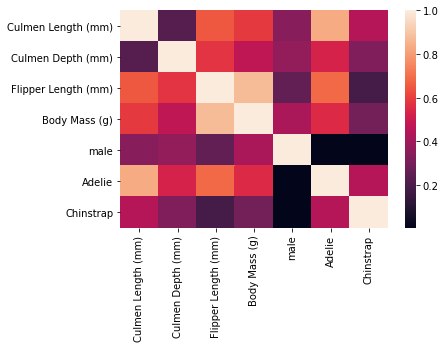

In [3]:
sns.heatmap(df.corr().abs())

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
sc = StandardScaler()
X = sc.fit_transform(df) # we need a mean of zero

In [6]:
pca = PCA(n_components=3) # does math magic with Eigenvectors
pca.fit(X)
T = pca.transform(X)  # transformed feature space

In [7]:
# weights for the 1st principal component
pca.components_[0].round(3)

array([ 0.45 , -0.317,  0.495,  0.464,  0.146, -0.464,  0.03 ])

<AxesSubplot:>

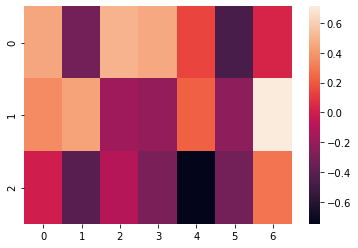

In [8]:
# principal components
sns.heatmap(pca.components_)

In [9]:
T = pd.DataFrame(T)

<AxesSubplot:>

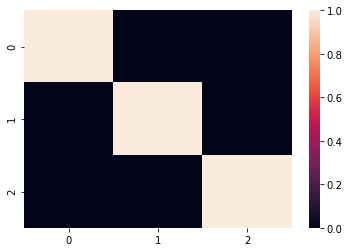

In [10]:
sns.heatmap(T.corr().abs())

In [11]:
from matplotlib import pyplot as plt

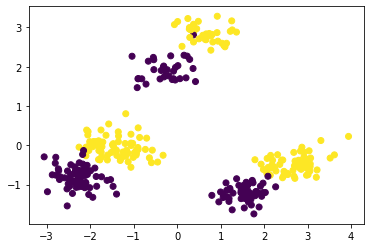

In [12]:
plt.scatter(T[0], T[1], c=df['male'])

In [13]:
# ranking in the new features in T:
# 1st is the most important --> describes most of the variance in X
# 2nd is the second most important, and so on

In [14]:
pca.explained_variance_ratio_.round(4)

array([0.4986, 0.2425, 0.1997])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

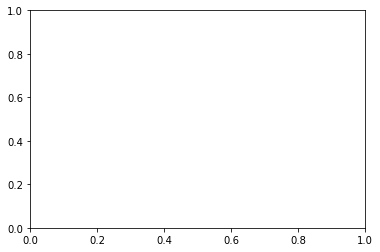

In [15]:
#plt.bar(range(7), pca.explained_variance_ratio_)

### Use Cases PCA

* feature reduction -> use only N most important features
* --> speed up supervised learning
* --> reduce overfitting
* --> no multicolinearity

`X -> scale -> PCA -> LogReg`

`X -> scale -> PCA -> plot`

`X -> scale -> PCA -> TSNE -> plot` 

### Downsides

* we don't know the meaning of the Principal Components W
* the data has to have a mean of zero (ideally it is scaled)

### Reverse PCA

In [16]:
Xp = pca.inverse_transform(T)

In [17]:
Xp

array([[-0.91364368,  1.16290906, -0.87827013, ...,  0.65440531,
         1.33591561, -0.43244229],
       [-1.12030865,  0.05564261, -0.8238047 , ..., -0.77992087,
         0.90020264, -0.4938809 ],
       [-1.05649955,  0.15603948, -0.87669452, ..., -0.74373971,
         0.86277164, -0.33867802],
       ...,
       [ 1.14000875, -0.74424301,  1.62881454, ...,  1.05089164,
        -0.94150115, -0.54682674],
       [ 0.32376947, -1.47415441,  0.95897133, ..., -0.74283915,
        -0.81065124, -0.54515301],
       [ 0.95060608, -0.47381039,  1.26608014, ...,  0.94279197,
        -0.73982048, -0.35527052]])

In [18]:
W = pca.components_
W.shape

(3, 7)

In [19]:
df.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'male', 'Adelie', 'Chinstrap'],
      dtype='object')

In [20]:
comp = pd.DataFrame(W, columns=df.columns)
comp.T.round(3)

,0,1,2
Culmen Length (mm),0.450,0.359,0.004
Culmen Depth (mm),-0.317,0.442,-0.413
Flipper Length (mm),0.495,-0.172,-0.092
Body Mass (g),0.464,-0.203,-0.286
male,0.146,0.225,-0.746
Adelie,-0.464,-0.223,-0.314
Chinstrap,0.030,0.711,0.289
